In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

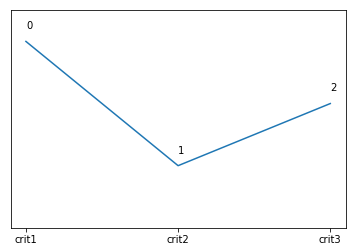

In [13]:
labels = ['crit1', 'crit2', 'crit3']
points = [3, 1, 2]

plt.plot(points)
plt.yticks([])
plt.xticks(range(len(labels)), labels)
plt.ylim(0, max(points) + 0.5)

for i, j in enumerate(points):
    plt.annotate(str(i), (i,j + 0.2))

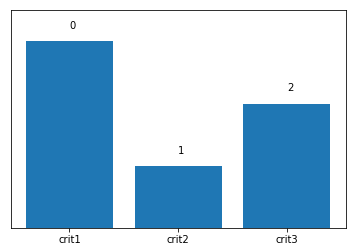

In [15]:
plt.bar(range(len(labels)),points)
plt.yticks([])
plt.xticks(range(len(labels)), labels)
plt.ylim(0, max(points) + 0.5)

for i, j in enumerate(points):
    plt.annotate(str(i), (i,j + 0.2))

In [3]:
def convert_input(class_a, class_b):
    y = np.concatenate(
        (
            np.ones(shape=(class_a.shape[0],1), dtype=np.int),
            -np.ones(shape=(class_b.shape[0],1), dtype=np.int)
        ),
        axis=0
    )
    
    X = np.concatenate((class_a, class_b), axis=0)
    
    V = np.concatenate((y * X, y), axis=1)
    
    V_pv = np.linalg.pinv(V)
    return V, V_pv

In [51]:
def optimize(V, V_pv, h):
    def u(x):
        return x * np.heaviside(x, 1)
    
    k = 0
#     b = np.random.uniform(low=0.01, high=10, size=(V_pv.shape[1], 1))
    b = np.ones(shape=(V_pv.shape[1], 1))
    w = V_pv.dot(b)

    while np.any((V.dot(w) - b) < 0):
        if np.all((V.dot(w) - b) == 0):
            return None
        
        b_next = b + h * u(np.dot(V, w) - b)
        
        if np.all(b == b_next):
            break
            
        if np.all((V.dot(w) - b) == 0):
            print('Classes are not lin sep')
            break
            
        b = b_next
        
        w = np.dot(V_pv, b)
        k += 1
        
    print(f"{k} iterations made")
    return w

In [55]:
def get_weights(class1, class2):
    h = 0.01
    
    V, V_pv = convert_input(class1, class2)
    return optimize(V, V_pv, h)

In [38]:
def find_funcs(classes, pairs):
    funcs = list()
    for i in pairs:
        funcs.append(get_weights(classes[i[0]], classes[i[1]]))
    return np.array(funcs).reshape(-1, 3)

In [62]:
def classify(funcs, objects):
#      (0, 1),
#     (1, 2),
#     (0, 2),
#     (0, 3),
#     (1, 3),
#     (2, 3)
    
    
    ones = np.ones(shape=(objects.shape[0], 1))
    objects = np.concatenate((objects, ones), axis=1).transpose()
    
    y = funcs.dot(objects).transpose() > 0
    
    cls = np.full((y.shape[0]), len(funcs))

#     classified = np.where(np.sum(y, axis=1) == 1)[0]
    
#     labels = np.where(y[classified])[1]
    labels = list()
    for i in range(y.shape[0]):
        if y[i, 0] and y[i, 2] and y[i, 3]:
            cl = 0
        elif y[i, 1] and y[i, 4] and not y[i, 0]:
            cl = 1
        elif not y[i, 1] and not y[i, 2] and y[i, 5]:
            cl = 2
        elif not y[i, 3] and not y[i, 4] and not y[i, 5]:
            cl = 3
        else:
            cl = 4
            
        labels.append(cl)
    
#     cls[classified] = labels
    
    return np.array(labels)


In [59]:
def get_line(w, classes):
    x = np.arange(-0.1, 1.1, 0.1)
    y = -(w[0] * x + w[2]) / w[1]
    
    return x, y

In [60]:
def get_areas(funcs, left, right, top, bottom, dpi):
    x1 = np.arange(left, right, dpi)
    x2 = np.arange(bottom, top, dpi)
    
    X1, X2 = np.meshgrid(x1, x2)
    shape = X1.shape
    objects = np.column_stack((X1.flatten(), X2.flatten()))
    
    labels = classify(funcs, objects)
    labels = labels.reshape(shape)

    return labels

def draw_areas(ax, areas, colors, left, right, top, bottom):
    cmap = plt.cm.jet
    cmaplist = [cmap(i) for i in range(cmap.N)]
    for i in range(len(colors)):
        cmaplist[i] = colors[i]
    cmap = cmap.from_list('Custom cmap', colors, cmap.N)
    bounds = np.linspace(0,6,7)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    
    ax.imshow(areas, cmap=cmap, extent=[left, right, top, bottom], norm=norm)
#     cb = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')


In [10]:
l = [2,5,1]

In [11]:
l

[2, 5, 1]

In [12]:
def one_vs_all(classes):
    funcs = list()
    for i in classes:
        rest = np.concatenate([i for i in np.delete(classes,one, axis=0)], axis=0)
        funcs.append(get_weights(i, rest))
    return np.array(funcs).reshape(-1, 3)

In [56]:
classes = np.array(
    [
#         [[0.05, 0.91],
#       [0.14, 0.96],
#       [0.16, 0.9],
#       [0.07, 0.7],
#       [0.2, 0.63]],

     
         [[0.49, 0.89],
      [0.34, 0.81],
      [0.36, 0.67],
      [0.47, 0.49],
      [0.52, 0.53]],

#      [[0.62, 0.83],
#       [0.79, 0.92],
#       [0.71, 0.92],
#       [0.78, 0.83],
#       [0.87, 0.92]],

     [[0.55, 0.4],
      [0.66, 0.32],
      [0.74, 0.49],
      [0.89, 0.3],
      [0.77, 0.2]],

     [[0.31, 0.43],
      [0.45, 0.27],
      [0.33, 0.16],
      [0.56, 0.29],
      [0.54, 0.13]],

     [[0.05, 0.15],
      [0.09, 0.39],
      [0.13, 0.51],
      [0.25, 0.34],
      [0.15, 0.36]]
    ])

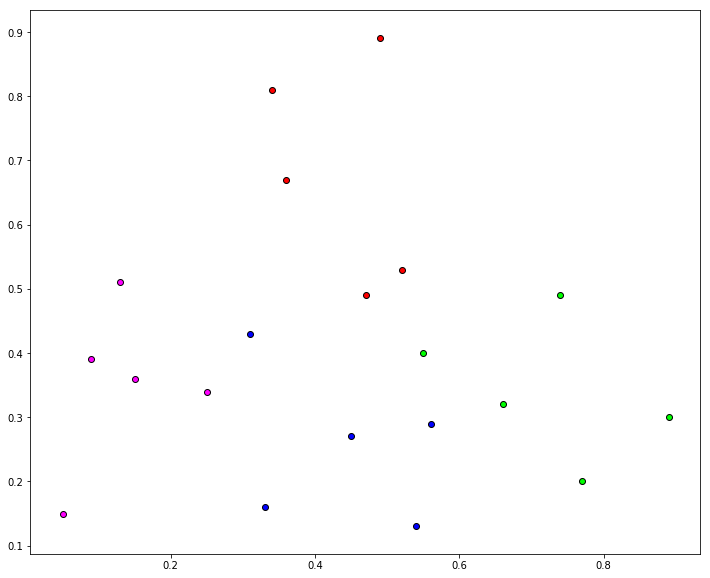

In [54]:
plt.figure(figsize=(12, 10))
for i in range(len(classes)):
    plt.scatter(classes[i, :,0], classes[i, :, 1], c=marker_colors[i], edgecolor='black')


246425 iterations made
185735 iterations made
124162 iterations made
40506 iterations made
44341 iterations made
282747 iterations made


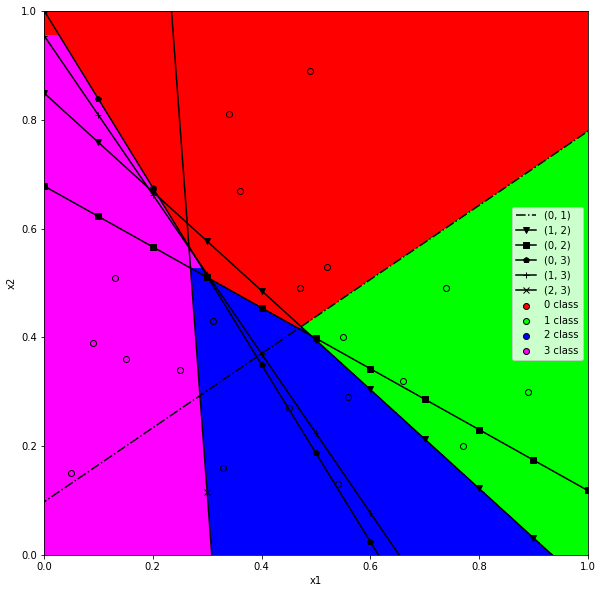

In [61]:
pairs = [
    (0, 1),
    (1, 2),
    (0, 2),
    (0, 3),
    (1, 3),
    (2, 3)
]
funcs = find_funcs(classes, pairs)
# funcs = one_vs_all(classes)
objects = classes.reshape(-1, 2)
labels = classify(funcs, objects)
lines = [get_line(funcs[i], classes) for i in range(len(funcs))]

#################################



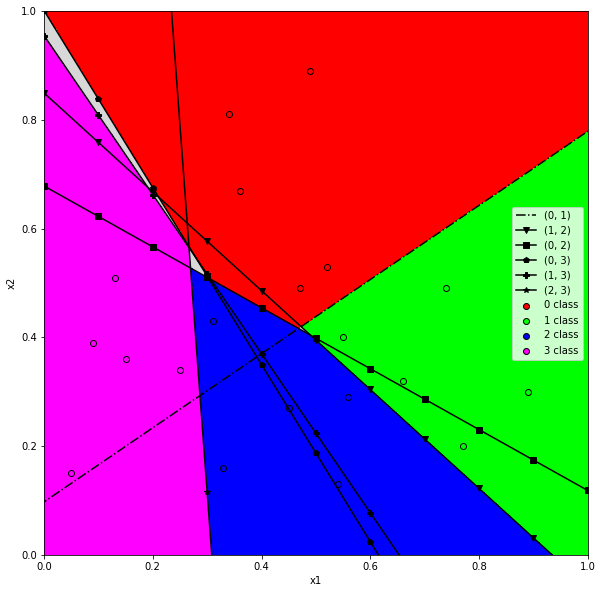

In [76]:
dark = 1
grey = 0.85
area_colors = [
    (dark, 0, 0, 1),
    (0, dark, 0, 1),
    (0, 0, dark, 1),
    (dark, 0, dark, 1),
    (grey, grey, grey, 1),
    (grey, grey, grey, 1)
]

marker_colors = [
    (1, 0, 0),
    (0, 1, 0),
    (0, 0, 1),
    (1, 0, 1),
    (1, 0, ),
]

line_markers = '.vspP*'

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.set_ylim(bottom=0, top=1)
ax.set_xlim(left=0, right=1)
ax.set_facecolor((grey, grey, grey))

draw_areas(ax, get_areas(funcs, 0, 1, 1, 0, 0.001), area_colors, left=0, right=1, bottom=0, top=1)

for i in range(len(classes)):
    plt.scatter(classes[i, :,0], classes[i, :, 1], c=marker_colors[i], edgecolor='black')

plt.xlabel('x1')
plt.ylabel('x2')

for i in range(len(lines)):
    plt.plot(lines[i][0], lines[i][1], '-'+line_markers[i], c='black')
    
plt.legend([str(i) for i in pairs] + [f"{i} class" for i in range(len(classes))])

# plt.show()
plt.draw()